In [807]:
import pandas as pd
import numpy as np
import json
import xmltodict

import seaborn as sns
import matplotlib.pyplot as plt
import glob as glob

## 1. Functions

### 1. Display Question Pool

In [808]:
def level_value_and_labels(file_path):
    with open(file_path) as fd:
        doc = xmltodict.parse(fd.read())

    df_xml1 = pd.DataFrame(doc['quiz'])
    df_xml1

    columns_name = df_xml1['question'][0].keys()

    data = []
    subject_xml1_df = pd.DataFrame(data, columns=columns_name)

    for i in range(len(df_xml1)):
        subject_xml1_df.loc[i] = df_xml1['question'][i]

    names = []
    for i in range(len(subject_xml1_df)):
        names.append(subject_xml1_df['name'][i]['text'])

    subject_xml1_df['name'] = names

    level = []
    q_type = []
    for i in range(len(subject_xml1_df)):
        if(pd.isna(subject_xml1_df['tags'][i])):
            level.append('pending')
            q_type.append('pending')
        else:
            level_object = str(subject_xml1_df['tags'][i]['tag'])

            if('l1' in level_object or 'L1' in level_object):
                level.append('L1')
            elif('l2' in level_object or 'L2' in level_object):
                level.append('L2')
            elif('l3' in level_object or 'L3' in level_object):
                level.append('L3')
            elif('pending' in level_object or 'Pending' in level_object):
                level.append('pending')
            else:
                level.append('reviewing')

            
            if('exam' in level_object or 'Exam' in level_object):
                q_type.append('exam')
            elif('quiz' in level_object or 'Quiz' in level_object):
                q_type.append('quiz')
            elif('pretest' in level_object or 'Pretest' in level_object):
                q_type.append('pretest')
            elif('pending' in level_object or 'Pending' in level_object):
                q_type.append('pending')
            elif('review' in level_object or 'Review' in level_object):
                q_type.append('review')
            else:
                q_type.append(None)

    print("Total Number of Question:", len(level))

    subject_xml1_df['level'] = level
    subject_xml1_df['q_type'] = q_type

    subject_xml1_df = subject_xml1_df[subject_xml1_df['level'] != 'pending']
    subject_xml1_df = subject_xml1_df[subject_xml1_df['level'] != 'reviewing']

    l1 = len(subject_xml1_df[subject_xml1_df['level'] == 'L1'])
    l2 = len(subject_xml1_df[subject_xml1_df['level'] == 'L2'])
    l3 = len(subject_xml1_df[subject_xml1_df['level'] == 'L3'])

    labels = sorted(subject_xml1_df['level'].unique().tolist())
    labels = [labels[0], labels[1], labels[2]]
    labels


    # Create an array of values
    # values = [l2, l1, l3, pending, review]
    values = [l1,l2,l3]

    # Create a list of labels
    labels = labels

    # Create a pie chart
    sns.set_style("whitegrid")
    plt.figure(figsize=(5,5))
    plt.pie(values, labels=labels, autopct='%1.0f%%', startangle=90)

    # Set the title
    plt.title("Proportion of Question Difficulty Level", fontweight='bold')

    # Set the legend
    plt.legend(title="Level", loc='upper left')

    # Show the chart
    plt.show()

    return [[l1,l2,l3], labels]

### 2. Display Questionstats

In [809]:
def display_questionstat(path):
    df_q_state = pd.read_excel(path, sheet_name=1)
    df_q_state.columns = df_q_state.columns.str.lower()

    facility_index_rate = []
    for facility_index in df_q_state['facility index']:
        facility_index = facility_index[:-1]
        # print(facility_index)
        facility_index_rate.append(float(facility_index))

    df_q_state['facility index'] = facility_index_rate

    df_q_state.loc[df_q_state['facility index'] <= float(60), 'label_facility_index'] = 'L3'
    df_q_state.loc[(df_q_state['facility index'] > float(60)) & (df_q_state['facility index'] <= float(80)), 'label_facility_index'] = 'L2'
    df_q_state.loc[(df_q_state['facility index'] > float(80)) & (df_q_state['facility index'] <= float(100)), 'label_facility_index'] = 'L1'

    
    l1 = len(df_q_state[df_q_state['label_facility_index'] == 'L1'])
    l2 = len(df_q_state[df_q_state['label_facility_index'] == 'L2'])
    l3 = len(df_q_state[df_q_state['label_facility_index'] == 'L3'])


    labels = df_q_state['label_facility_index'].unique().tolist()
    labels

    # Create an array of values
    values = [l1, l2, l3]
    print("Values", values)

    # Create a list of labels
    labels = sorted(labels)
    print("Labels", labels)

    # Create a pie chart
    sns.set_style("whitegrid")
    plt.figure(figsize=(5,5))
    plt.pie(values, labels=labels, autopct='%1.0f%%', startangle=90)
    # plt.pie(values, labels=labels)

    # Set the title
    plt.title('Question Level of Difficulty', fontweight='bold')

    # Set the legend
    plt.legend(title="Level", loc='upper left')

    # Show the chart
    plt.show()


## 2. Read XML

In [810]:
with open('./data_source_xml/3.xml') as fd:
    doc = xmltodict.parse(fd.read())

df_xml1 = pd.DataFrame(doc['quiz'])
df_xml1.head(3)

,question
0,"{'@type': 'matching', 'name': {'text': 'News-I..."
1,"{'@type': 'multichoice', 'name': {'text': '1-4..."
2,"{'@type': 'multichoice', 'name': {'text': '4-1..."


### Create Dataframe from XML file

In [811]:
columns_name = df_xml1['question'][0].keys()
# print(columns_name)

data = []
subject_xml1_df = pd.DataFrame(data, columns=columns_name)

for i in range(len(df_xml1)):
    subject_xml1_df.loc[i] = df_xml1['question'][i]

# subject_xml1_df.head(3)

### Clean Question Name

In [812]:
names = []
for i in range(len(subject_xml1_df)):
    names.append(subject_xml1_df['name'][i]['text'])

subject_xml1_df['name'] = names
subject_xml1_df.head(3)

### Add Column Level and QuestionType

In [813]:
level = []
q_type = []
for i in range(len(subject_xml1_df)):
    
    if(pd.isna(subject_xml1_df['tags'][i])):
        level.append('pending')
        q_type.append('pending')
        # print(True)
    else:
        level_object = str(subject_xml1_df['tags'][i]['tag'])


        if('l1' in level_object or 'L1' in level_object):
            level.append('L1')
        elif('l2' in level_object or 'L2' in level_object):
            level.append('L2')
        elif('l3' in level_object or 'L3' in level_object):
            level.append('L3')
        elif('pending' in level_object or 'Pending' in level_object):
            level.append('pending')
        else:
            level.append('reviewing')

        
        if('exam' in level_object or 'Exam' in level_object):
            q_type.append('exam')
        elif('quiz' in level_object or 'Quiz' in level_object):
            q_type.append('quiz')
        elif('pretest' in level_object or 'Pretest' in level_object):
            q_type.append('pretest')
        elif('pending' in level_object or 'Pending' in level_object):
            q_type.append('pending')
        elif('review' in level_object or 'Review' in level_object):
            q_type.append('review')
        else:
            q_type.append(None)

print(len(level))

subject_xml1_df['level'] = level
subject_xml1_df['q_type'] = q_type

# subject_xml1_df.to_excel('xml1.xlsx')
# subject_xml1_df.head(3)

67


### Get dataframe where levels are not pending and reviewing

In [814]:
subject_xml1_df = subject_xml1_df[subject_xml1_df['level'] != 'pending']
subject_xml1_df = subject_xml1_df[subject_xml1_df['level'] != 'reviewing']

In [815]:
l1 = len(subject_xml1_df[subject_xml1_df['level'] == 'L1'])
l2 = len(subject_xml1_df[subject_xml1_df['level'] == 'L2'])
l3 = len(subject_xml1_df[subject_xml1_df['level'] == 'L3'])
# pending = len(subject_xml1_df[subject_xml1_df['level'] == 'pending'])
# review = len(subject_xml1_df[subject_xml1_df['level'] == 'reviewing'])
print([l1, l2, l3])

labels = sorted(subject_xml1_df['level'].unique().tolist())
labels = [labels[0], labels[1], labels[2]]
print(labels)

[32, 17, 10]
['L1', 'L2', 'L3']


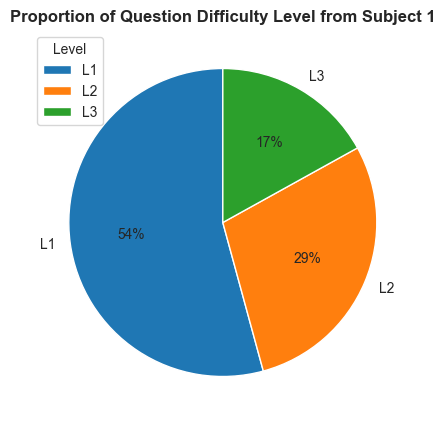

In [816]:
# Create an array of values
# values = [l2, l1, l3, pending, review]
values = [l1, l2, l3]

# Create a list of labels
labels = labels

# Create a pie chart
sns.set_style("whitegrid")
plt.figure(figsize=(5,5))
plt.pie(values, labels=labels, autopct='%1.0f%%', startangle=90)

# Set the title
plt.title("Proportion of Question Difficulty Level from Subject 1", fontweight='bold')

# Set the legend
plt.legend(title="Level", loc='upper left')

# Show the chart
plt.show()

Total Number of Question: 112


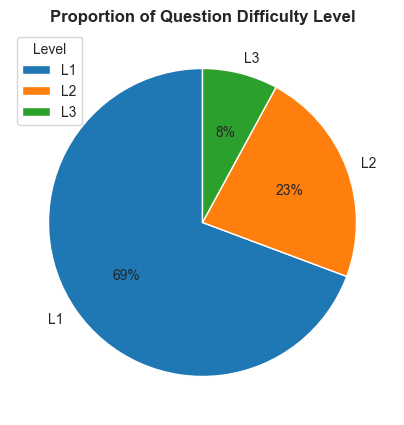

Subject 1 [[70, 23, 8], ['L1', 'L2', 'L3']] 

Total Number of Question: 16


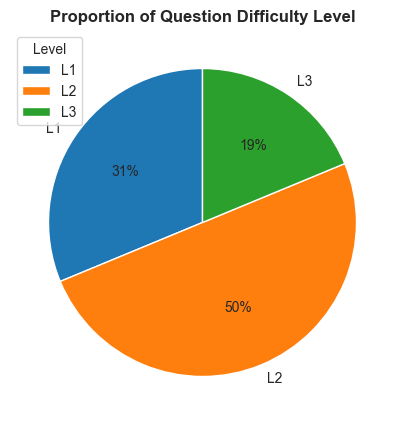

Subject 2 [[5, 8, 3], ['L1', 'L2', 'L3']] 

Total Number of Question: 67


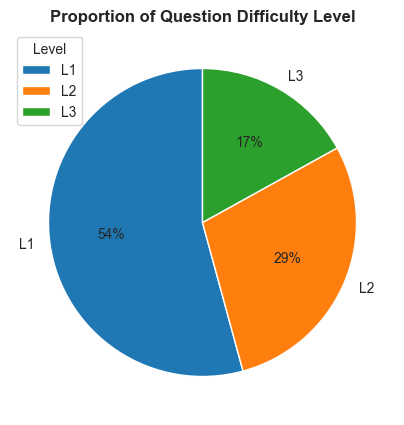

Subject 3 [[32, 17, 10], ['L1', 'L2', 'L3']] 

Total Number of Question: 46


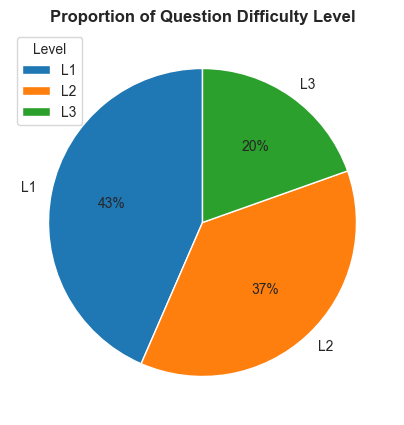

Subject 4 [[20, 17, 9], ['L1', 'L2', 'L3']] 

Total Number of Question: 83


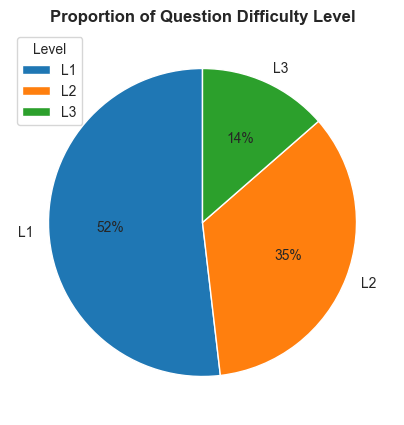

Subject 5 [[42, 28, 11], ['L1', 'L2', 'L3']] 

Total Number of Question: 70


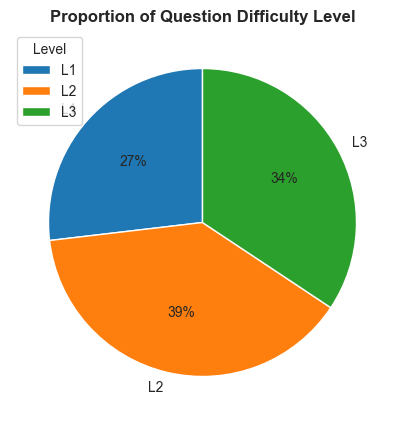

Subject 6 [[18, 26, 23], ['L1', 'L2', 'L3']] 

Total Number of Question: 62


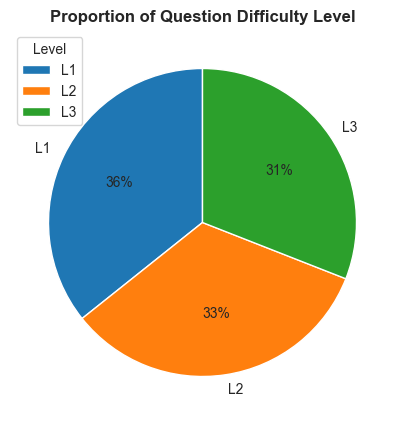

Subject 7 [[15, 14, 13], ['L1', 'L2', 'L3']] 

Total Number of Question: 51


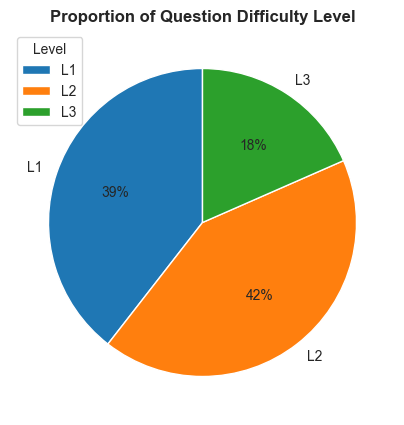

Subject 8 [[15, 16, 7], ['L1', 'L2', 'L3']] 

Total Number of Question: 50


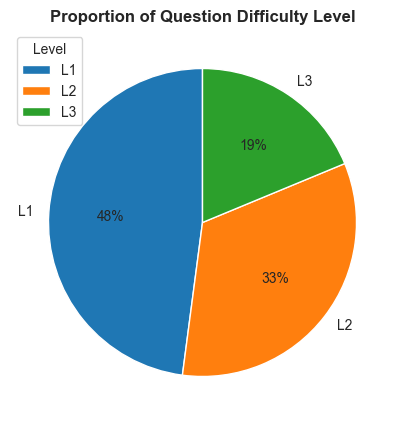

Subject 9 [[23, 16, 9], ['L1', 'L2', 'L3']] 

Total Number of Question: 70


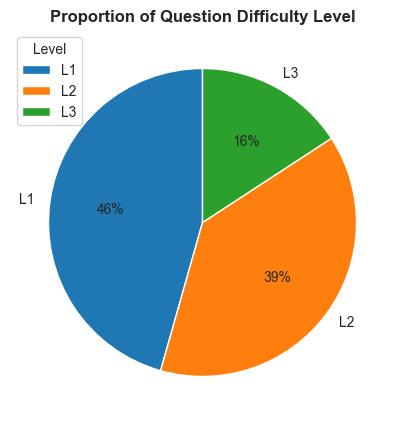

Subject 10 [[26, 22, 9], ['L1', 'L2', 'L3']] 

Total Number of Question: 26


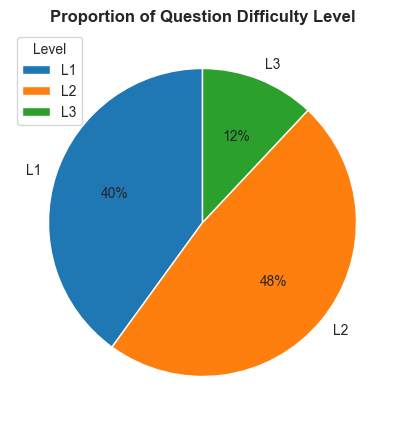

Subject 11 [[10, 12, 3], ['L1', 'L2', 'L3']] 

Total Number of Question: 37


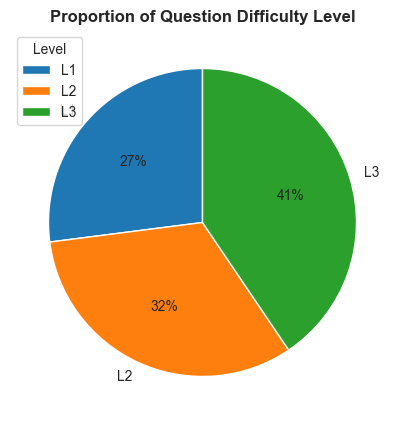

Subject 12 [[10, 12, 15], ['L1', 'L2', 'L3']] 



In [817]:
xml1 = level_value_and_labels('./data_source_xml/1.xml')
print('Subject 1', xml1, '\n')

xml2 = level_value_and_labels('./data_source_xml/2.xml')
print('Subject 2', xml2, '\n')

xml3 = level_value_and_labels('./data_source_xml/3.xml')
print('Subject 3', xml3, '\n')

xml4 = level_value_and_labels('./data_source_xml/4.xml')
print('Subject 4', xml4, '\n')

xml5 = level_value_and_labels('./data_source_xml/5.xml')
print('Subject 5', xml5, '\n')

xml6 = level_value_and_labels('./data_source_xml/6.xml')
print('Subject 6', xml6, '\n')

xml7 = level_value_and_labels('./data_source_xml/7.xml')
print('Subject 7', xml7, '\n')

xml8 = level_value_and_labels('./data_source_xml/8.xml')
print('Subject 8', xml8, '\n')

xml9 = level_value_and_labels('./data_source_xml/9.xml')
print('Subject 9', xml9, '\n')

xml10 = level_value_and_labels('./data_source_xml/10.xml')
print('Subject 10', xml10, '\n')

xml11 = level_value_and_labels('./data_source_xml/11.xml')
print('Subject 11', xml11, '\n')

xml12 = level_value_and_labels('./data_source_xml/12.xml')
print('Subject 12', xml12, '\n')

## 3. Read QuestionStats

#### Read Excel File

In [818]:
df_q_state = pd.read_excel('./data_source/ប្រឡងវិញ្ញាបនបត្រជំនាញឌីជីថលចាំបាច់/DSE-EXAM-ERA5-Senate-វិញ្ញាសាប្រឡង-questionstats.xlsx', sheet_name=1)
df_q_state.columns = df_q_state.columns.str.lower()
df_q_state.head(1)

,q#,question type,question name,attempts,facility index,standard deviation,random guess score,intended weight,effective weight,discrimination index,discriminative efficiency
0,1.0,Random,Random (០១​. កុំព្យូទ័រចាំបាច់ and subcategori...,670,58.81%,49.10%,NaN,1.00%,0.96%,24.23%,29.61%


#### Change Facility Index from String to Float

In [819]:

facility_index_rate = []
for facility_index in df_q_state['facility index']:
    facility_index = facility_index[:-1]
    # print(facility_index)
    facility_index_rate.append(float(facility_index))

df_q_state['facility index'] = facility_index_rate
df_q_state.head(1)

,q#,question type,question name,attempts,facility index,standard deviation,random guess score,intended weight,effective weight,discrimination index,discriminative efficiency
0,1.0,Random,Random (០១​. កុំព្យូទ័រចាំបាច់ and subcategori...,670,58.81,49.10%,NaN,1.00%,0.96%,24.23%,29.61%


#### Set Question Difficulty Level

In [820]:
df_q_state.loc[df_q_state['facility index'] <= float(60), 'label_facility_index'] = 'L3'
df_q_state.loc[(df_q_state['facility index'] > float(60)) & (df_q_state['facility index'] <= float(80)), 'label_facility_index'] = 'L2'
df_q_state.loc[(df_q_state['facility index'] > float(80)) & (df_q_state['facility index'] <= float(100)), 'label_facility_index'] = 'L1'

df_q_state.head(2)

,q#,question type,question name,attempts,facility index,standard deviation,random guess score,intended weight,effective weight,discrimination index,discriminative efficiency,label_facility_index
0,1.0,Random,Random (០១​. កុំព្យូទ័រចាំបាច់ and subcategori...,670,58.81,49.10%,NaN,1.00%,0.96%,24.23%,29.61%,L3
1,2.0,Random,Random (០១​. កុំព្យូទ័រចាំបាច់ and subcategori...,670,57.99,49.05%,NaN,1.00%,0.98%,25.71%,31.29%,L3


#### Get value and label for visualization

In [821]:
l1 = len(df_q_state[df_q_state['label_facility_index'] == 'L1'])
l2 = len(df_q_state[df_q_state['label_facility_index'] == 'L2'])
l3 = len(df_q_state[df_q_state['label_facility_index'] == 'L3'])


labels = df_q_state['label_facility_index'].unique().tolist()
labels

['L3', 'L2', 'L1']

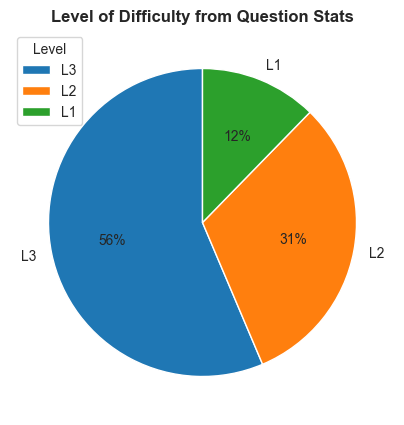

In [822]:
# Create an array of values
values = [l3, l2, l1]

# Create a list of labels
labels = labels

# Create a pie chart
sns.set_style("whitegrid")
plt.figure(figsize=(5,5))
plt.pie(values, labels=labels, autopct='%1.0f%%', startangle=90)
# plt.pie(values, labels=labels)

# Set the title
plt.title('Level of Difficulty from Question Stats', fontweight='bold')

# Set the legend
plt.legend(title="Level", loc='upper left')

# Show the chart
plt.show()


#### Display All Questionstats from Function

In [823]:
excel_data_paths = glob.glob('data_source/**/*.xlsx', recursive=True)
print("Amount of CSV file: ", len(excel_data_paths))
# print("Excel Data:", excel_data_paths)

Amount of CSV file:  20


data_source/ប្រឡងវិញ្ញាបនបត្រជំនាញឌីជីថលចាំបាច់ (ខេត្តព្រះវិហា ឧត្តមានជ័យ សៀមរាប-៧)/Exam-PVH-UDM-7-ប្រឡង-questionstats.xlsx
Values [45, 110, 299]
Labels ['L1', 'L2', 'L3']


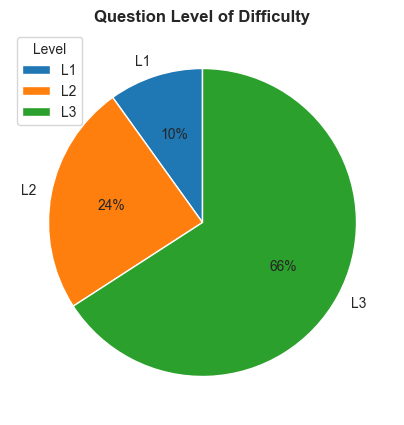

data_source/ប្រឡងវិញ្ញាបនបត្រជំនាញឌីជីថលចាំបាច់/DSE-EXAM-ERA5-Senate-វិញ្ញាសាប្រឡង-questionstats.xlsx
Values [53, 135, 243]
Labels ['L1', 'L2', 'L3']


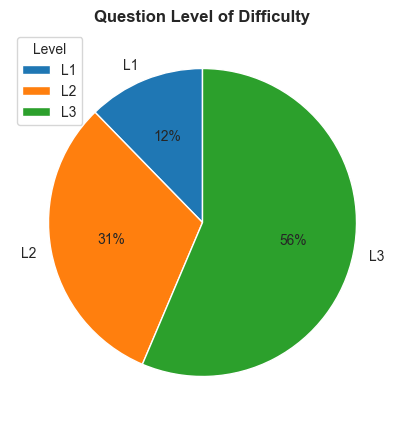

data_source/ប្រឡងវិញ្ញាបនបត្រជំនាញឌីជីថលចាំបាច់ខេត្តកែប-កំពត-ព្រះសីហនុ-កោះកុង/questionstats.xlsx
Values [28, 86, 287]
Labels ['L1', 'L2', 'L3']


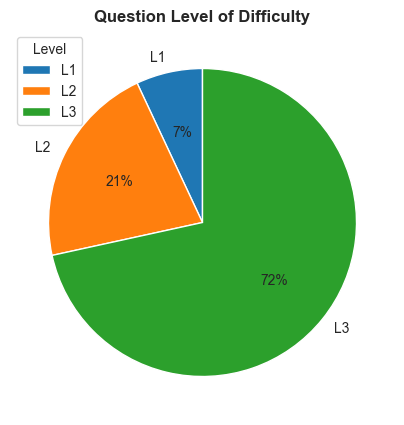

data_source/ប្រឡងវិញ្ញាបនបត្រជំនាញឌីជីថលចាំបាច់ (Senate-City Hall & Moeys)/ប្រឡងវិញ្ញាបនបត្រជំនាញឌីជីថលចាំបាច់(2022)-ប្រឡងវិញ្ញាបនបត្រជំនាញឌីជីថលចាំបាច់-questionstats.xlsx
Values [29, 113, 296]
Labels ['L1', 'L2', 'L3']


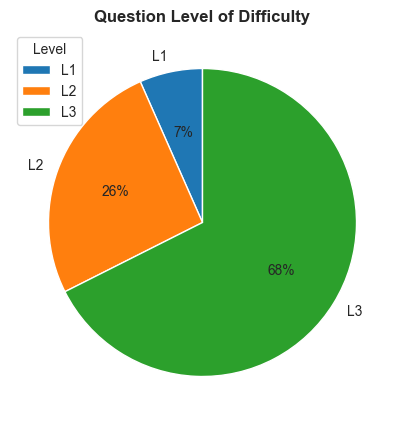

data_source/ប្រឡងវិញ្ញាបនបត្រជំនាញឌីជីថលចាំបាច់ខេត្តបន្ទាយមានជ័យ -​ ខេត្តបាត់ដំបង -ពោធិ៍សាត់ -កំពង់ឆ្នាំង-ប៉ៃលិន (DSE-09)/questionstats.xlsx
Values [28, 97, 302]
Labels ['L1', 'L2', 'L3']


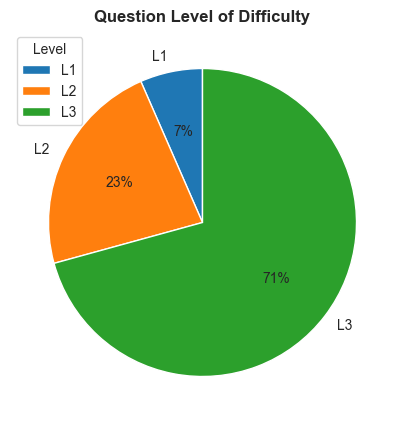

data_source/ប្រឡងវិញ្ញាបនបត្រជំនាញឌីជីថលចាំបាច់ នៃក្រសួងប្រៃសណីយ៍ និងទូរគមនាគមន៍-8/ប្រឡងវិញ្ញាបនបត្រក្រសួងប្រៃសណីយ៍ និងទូរគមនាគមន៍-ប្រឡងវិញ្ញាបនបត្រ DSE (ក្រសួងប្រៃសណីយ៍ និងទូរគមនាគមន៍-8)-questionstats.xlsx
Values [72, 157, 199]
Labels ['L1', 'L2', 'L3']


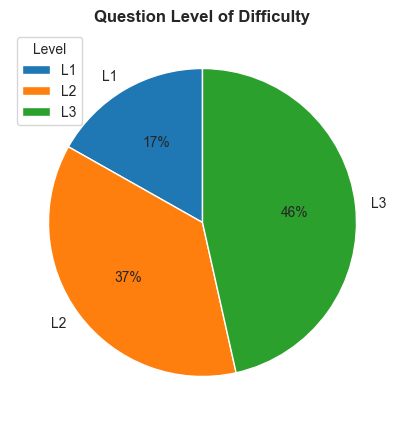

data_source/ប្រឡងវិញ្ញាបនបត្រជំនាញឌីជីថលចាំបាច់ (CADT)/ប្រឡងវិញ្ញាបនបត្រជំនាញឌីជីថលចាំបាច់ (CADT-1)-Exam-questionstats.xlsx
Values [89, 188, 181]
Labels ['L1', 'L2', 'L3']


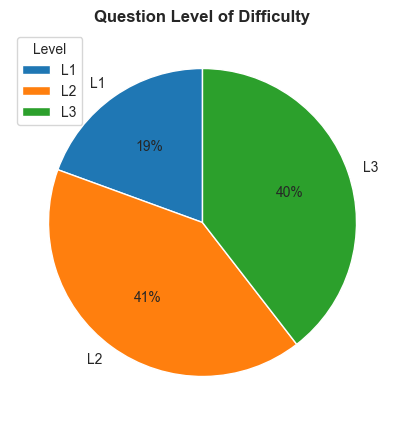

data_source/ប្រឡងវិញ្ញាបនបត្រជំនាញឌីជីថលចាំបាច់ (ខេត្ត-6)/ប្រឡងវិញ្ញាបនបត្រជំនាញឌីជីថលចាំបាច់(2022)-ប្រឡងវិញ្ញាបនបត្រជំនាញឌីជីថលចាំបាច់-questionstats.xlsx
Values [29, 113, 296]
Labels ['L1', 'L2', 'L3']


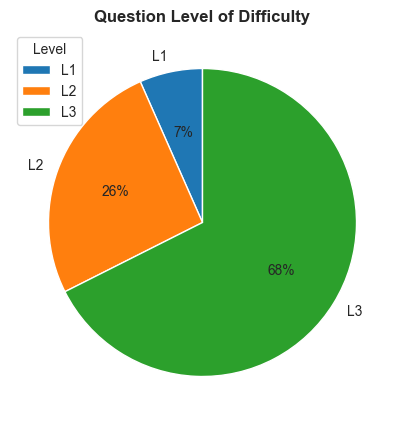

In [824]:
for path in excel_data_paths:
    if('questionstats' in path):
        print(path)

        display_questionstat(path)

        # df = pd.read_excel(path, sheet_name=1)
        # print(df.shape)
        # print('')

